# Question 2
## Use Random Forest to prepare a model on fraud data 
- Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
fraud = pd.read_csv('D:\\Data Science\\Assignment 15\\Raw data\\Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Performing EDA

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.duplicated().value_counts()

False    600
dtype: int64

#### There are no null and duplicated variables in the data

In [6]:
fraudnew = fraud.copy()
fraudnew = pd.get_dummies(fraud, columns=['Undergrad','Marital.Status','Urban'])

In [7]:
fraudnew.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


#### No variables are highly correlated to each others.

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

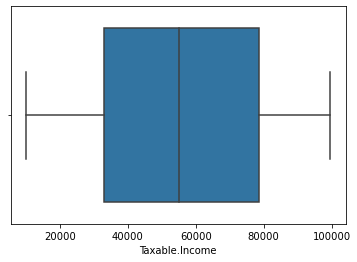

In [8]:
sns.boxplot(fraud['Taxable.Income'])

#### No outliers are there in the Dataset

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

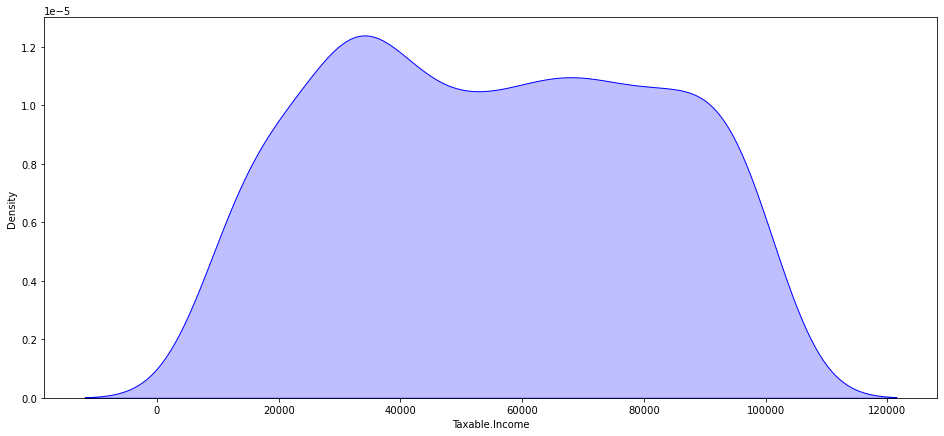

In [9]:
plt.figure(figsize=(16,7))
sns.kdeplot(fraud['Taxable.Income'],color = 'b',shade=True)

#### Most of people have Taxable Income between 10K to 1 Lacs.  

In [10]:
objects = fraud.select_dtypes(include='object').columns.tolist()
objects

['Undergrad', 'Marital.Status', 'Urban']

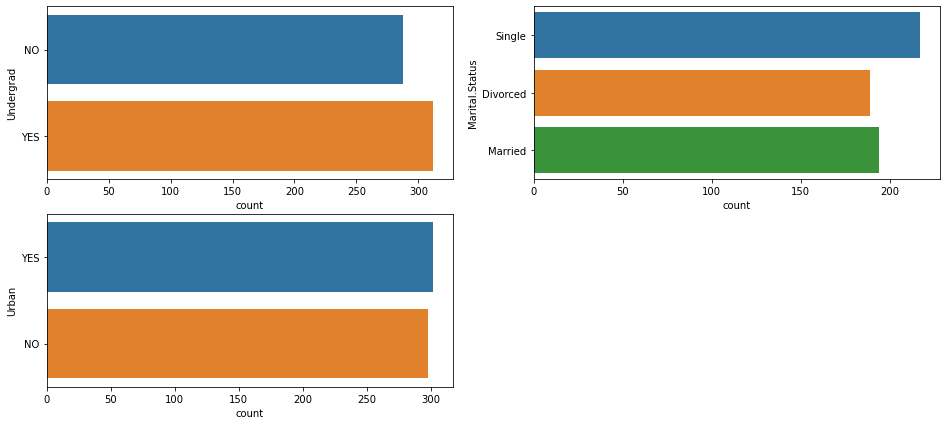

In [11]:
plt.figure(figsize=(16,7))
for i,col in enumerate(objects,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fraud,y=col)

In [12]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [13]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [14]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [15]:
nonobject = fraud.select_dtypes(exclude='object').columns.tolist()
nonobject

['Taxable.Income', 'City.Population', 'Work.Experience']

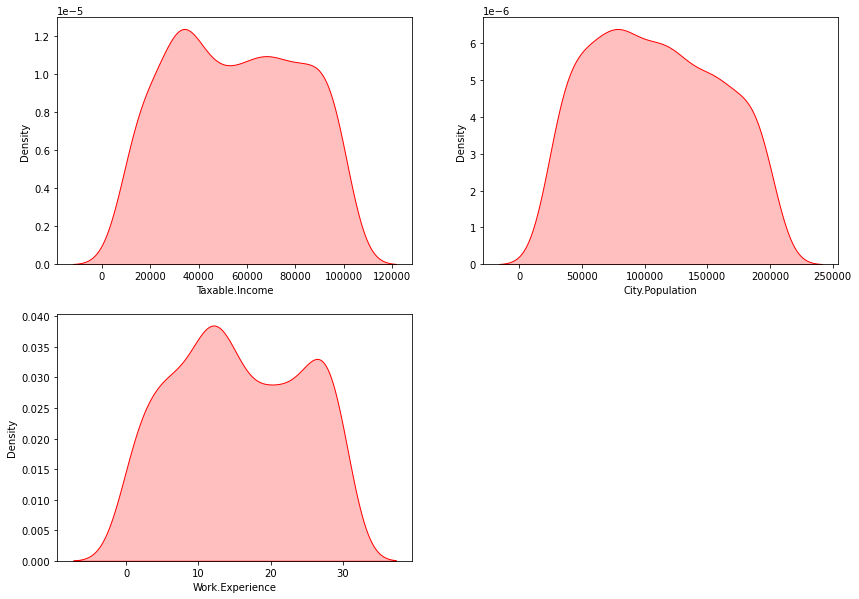

In [16]:
plt.figure(figsize=(14,10))
for i,col in enumerate(nonobject,1):
    plt.subplot(2,2,i)
    sns.kdeplot(data=fraud[col],shade=True,color='r')

<AxesSubplot:>

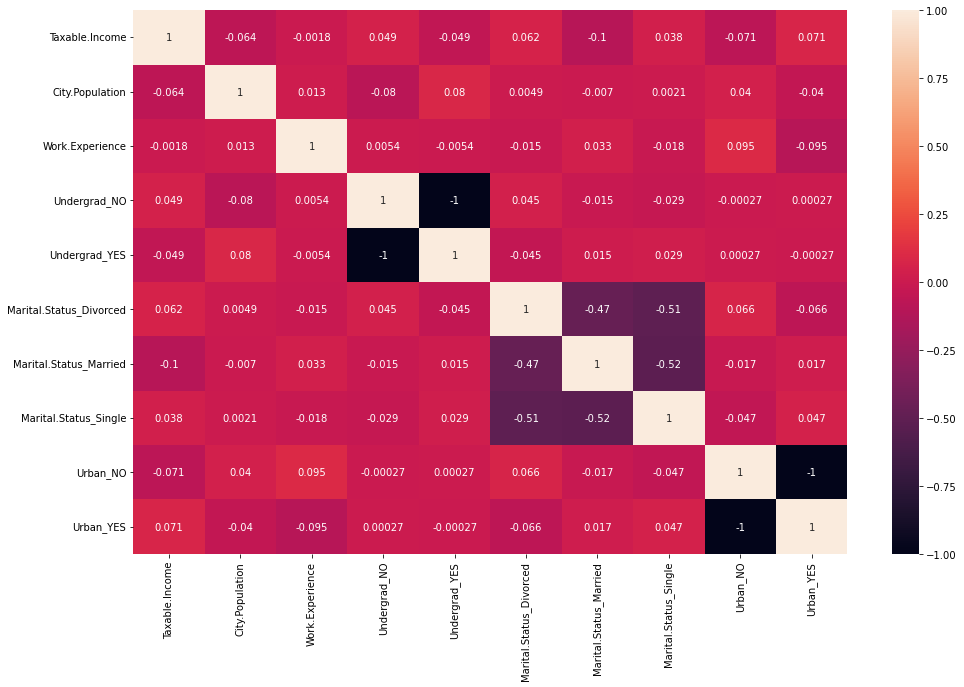

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(fraudnew.corr(),annot=True)

## Model Building - Random Forest

### Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [18]:
fraudnew['Taxable.Income'] = pd.cut(fraudnew['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])
fraudnew['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [19]:
x = fraudnew.iloc[:,1:]
y = fraudnew.iloc[:,0]

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=300)

In [21]:
ytrain.value_counts()

Good     376
Risky    104
Name: Taxable.Income, dtype: int64

In [22]:
kfold = KFold(n_splits=10,random_state=300, shuffle=True)
model = RandomForestClassifier(n_estimators=150,max_features=6)
result = cross_val_score(model,xtrain,ytrain,cv=kfold)

In [23]:
result

array([0.8125    , 0.66666667, 0.64583333, 0.70833333, 0.64583333,
       0.64583333, 0.8125    , 0.8125    , 0.75      , 0.6875    ])

In [24]:
result.mean()

0.71875

In [25]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_features=6, n_estimators=150)

In [26]:
pred = model.predict(xtest)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good

In [27]:
accuracy_score(ytest,pred)

0.7833333333333333

In [28]:
confusion_matrix(ytest,pred)

array([[92,  8],
       [18,  2]], dtype=int64)

# Model Interpretetion

### Accuracy on the test data is 78% . 
Note :- Accuracy keeps changing as the data changes in test split.
#### We get 94 variables correctly calassified and 26 wrongly predicted by the model.